## Importing Libraries and setting-up environment

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('TSLA', data_source='yahoo', start='2010-06-28', end = "2019-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


## Correcting the Dataset

In [5]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [6]:
df.shape

(2394, 1)

## Visualizing the Data

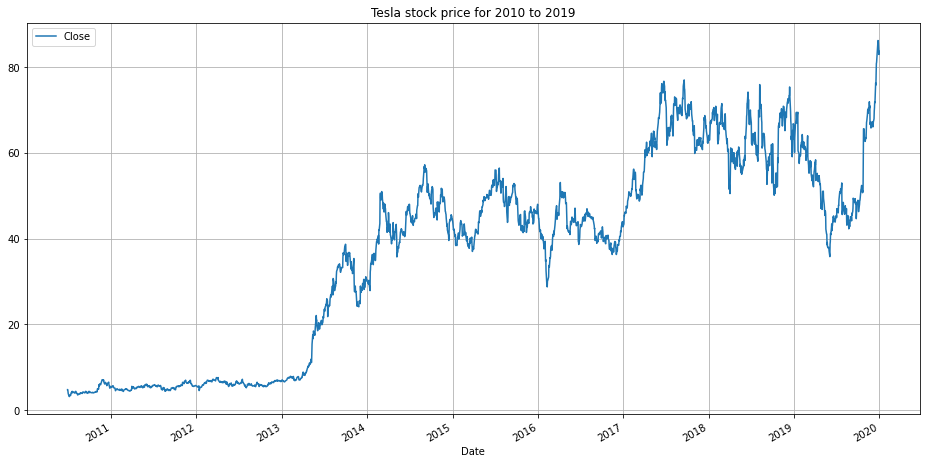

In [7]:
df.plot(figsize=(16,8), title = "Tesla stock price for 2010 to 2019", grid = True)

## Pre-processing

In [8]:
#Convert the dataframe to a numpy array

dataset = df.values

In [9]:
#Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [10]:
#Create the train and test data set

train_data = scaled_data[:1640]
test_data = scaled_data[1580:]

In [11]:
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
#Create the data sets x_test and y_test

training_data_len = train_data.shape[0]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Building the LSTM model
model = Sequential()
model.add(LSTM(int(input("LSTM 1: ")), return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(int(input("LSTM 2: ")), return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

LSTM 1: 50
LSTM 2: 50
1580/1580 [==============================] - 19s 12ms/step - loss: 0.0014


In [29]:
#Get the predicted values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [30]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 35.712471769339025
Mean Absolute Error(MAE): 5.0959379717272855
Root Mean Square Error (RMSE): 5.975991279222137


In [31]:
trn = df[:training_data_len]
tst = df[training_data_len:]
tst['Predictions'] = predictions

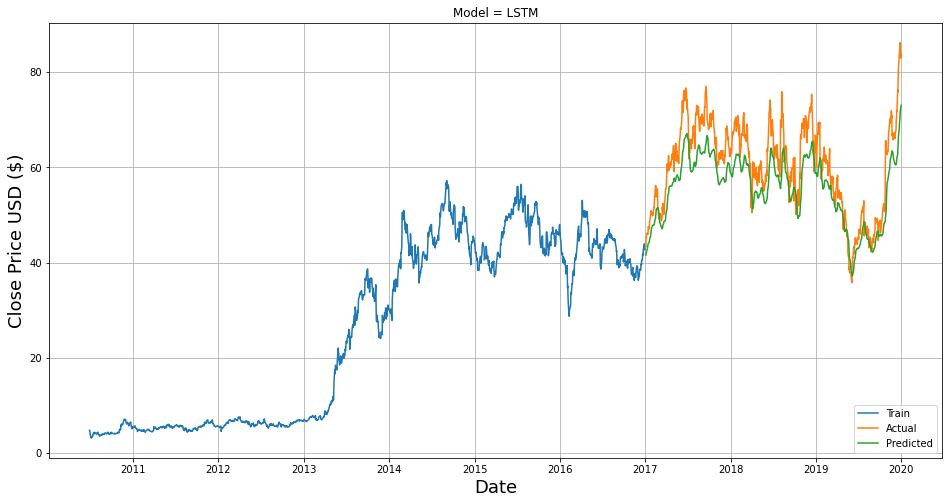

In [32]:
#Visualize the entire data

plt.figure(figsize=(16,8))
plt.title('Model = LSTM', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(trn['Close'])
plt.plot(tst[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

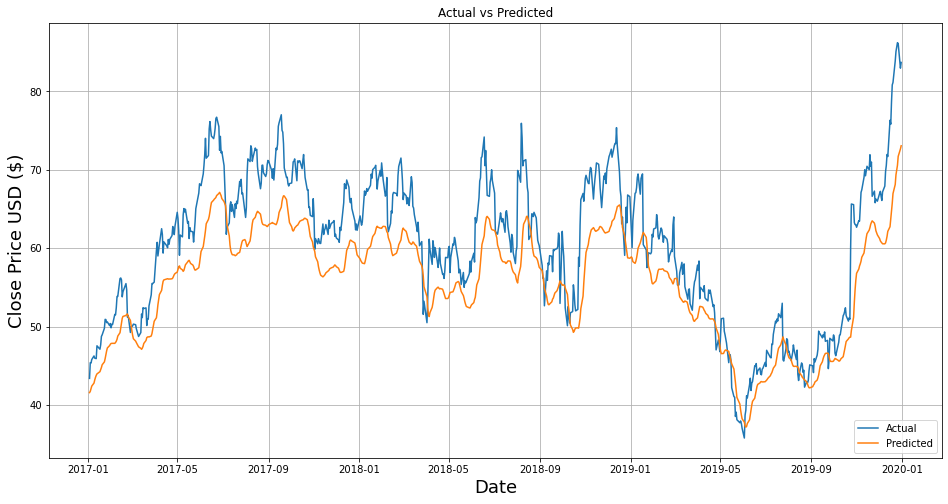

In [33]:
#Visualize the test data

plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(tst[['Close', 'Predictions']])
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

In [34]:
res = tst['Close'] - tst['Predictions']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

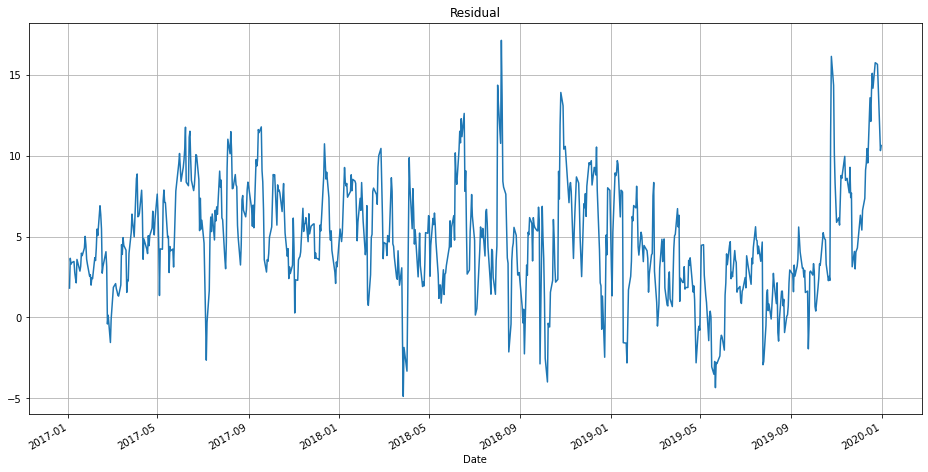

In [35]:
#Residual plot

res["Residual"].plot(title = 'Residual', figsize = (16,8), grid = True)

In [36]:
#Simple Moving Average of Residual

res['SMA_1'] = res.Residual.rolling(7, min_periods=1).mean() #Period of 1 week
res['SMA_2'] = res.Residual.rolling(14, min_periods=1).mean() #Period of 2 weeks
res['SMA_4'] = res.Residual.rolling(28, min_periods=1).mean() #Period of 4 weeks

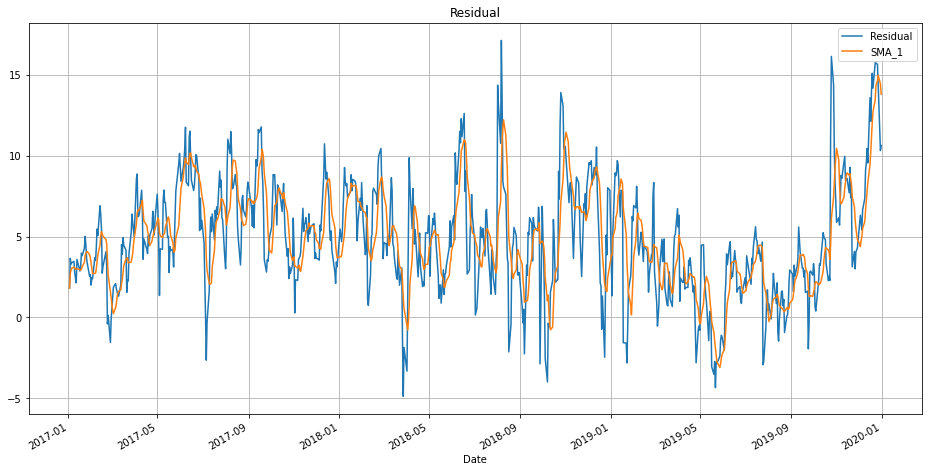

In [37]:
res[["Residual", "SMA_1"]].plot(title = 'Residual', figsize = (16,8), grid = True)

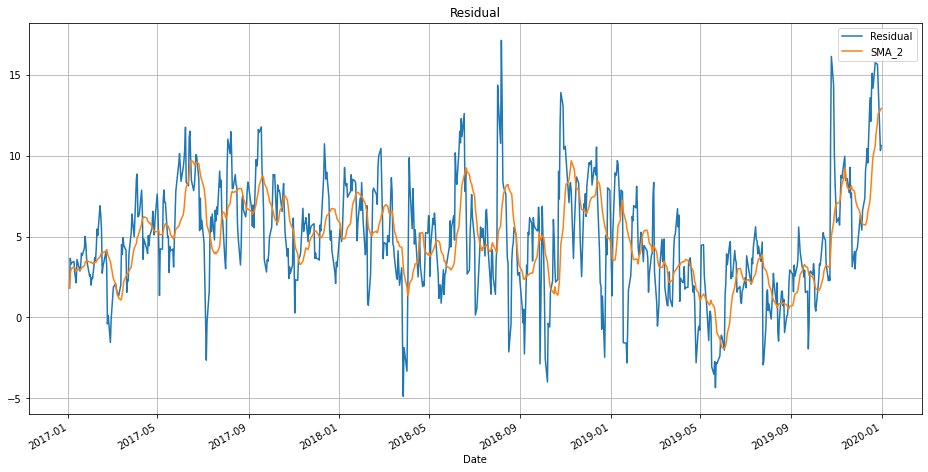

In [38]:
res[["Residual", "SMA_2"]].plot(title = 'Residual', figsize = (16,8), grid = True)

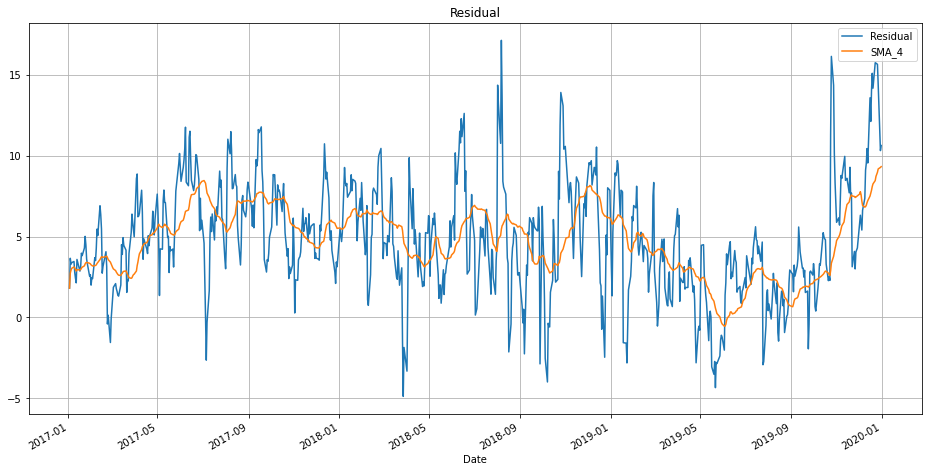

In [39]:
res[["Residual", "SMA_4"]].plot(title = 'Residual', figsize = (16,8), grid = True)

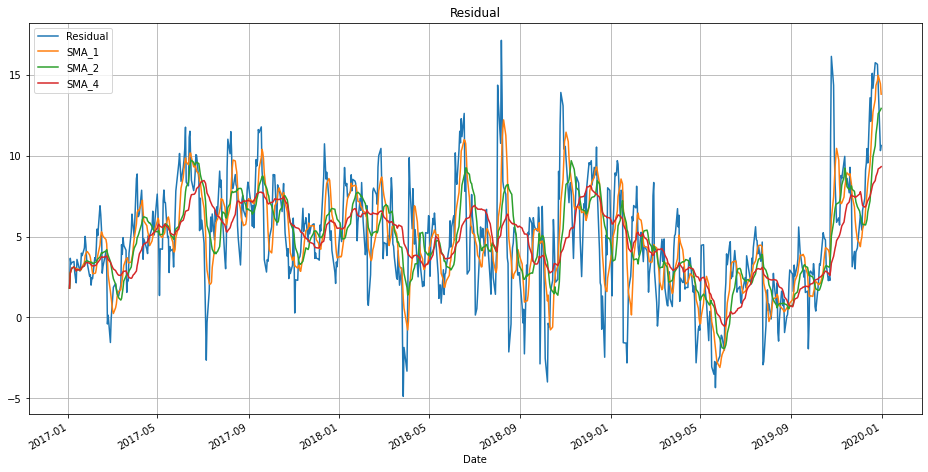

In [40]:
res.plot(title = 'Residual', figsize = (16,8), grid = True)

Made by: Hari N. Khatavkar

Credit: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm